In [160]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [161]:
auto_MPG = pd.read_excel("AutoMPG_data.xlsx")
print(auto_MPG.head(5))

   GallonsPer100Miles  GallonsPer100MilesTo1981   MPG  Cylinders  \
0            5.555556                  5.555556  18.0          8   
1            6.666667                  6.666667  15.0          8   
2            5.555556                  5.555556  18.0          8   
3            6.250000                  6.250000  16.0          8   
4            5.882353                  5.882353  17.0          8   

   Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  Year  \
0               3.07           1.30         3.504          12.0    70   
1               3.50           1.65         3.693          11.5    70   
2               3.18           1.50         3.436          11.0    70   
3               3.04           1.50         3.433          12.0    70   
4               3.02           1.40         3.449          10.5    70   

   Year70To81  Origin  Origin.Eq.1  Origin.Eq.2  Origin.Eq.3  \
0           1       1            1            0            0   
1           1       1   

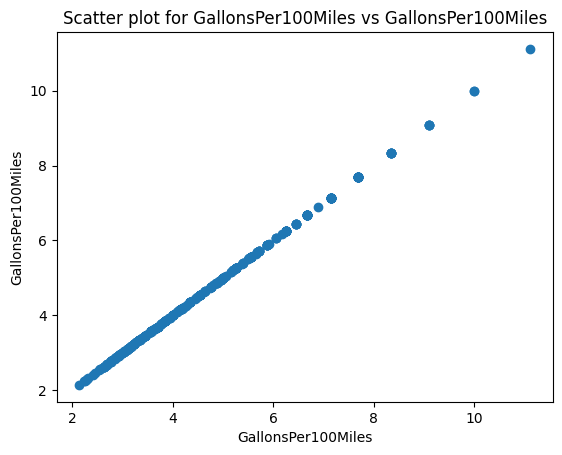

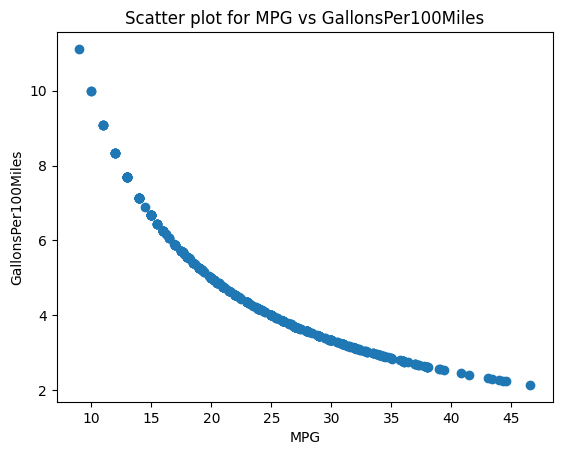

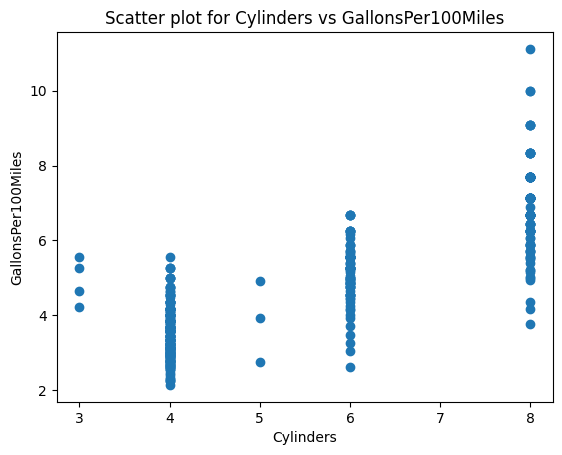

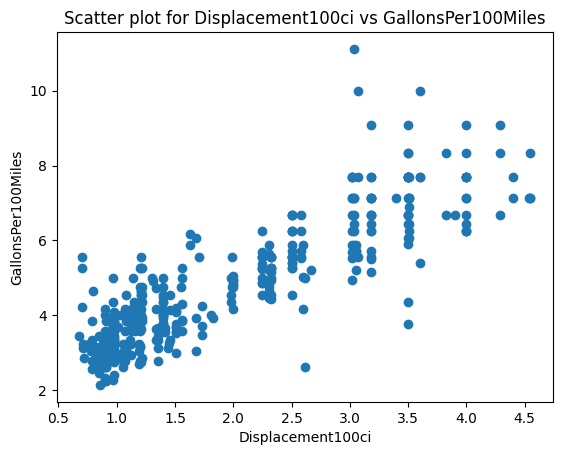

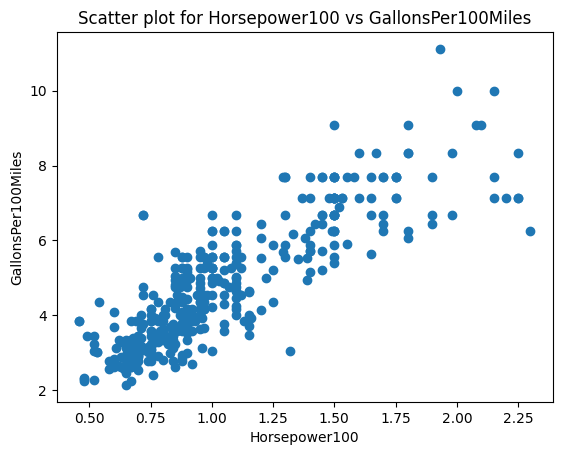

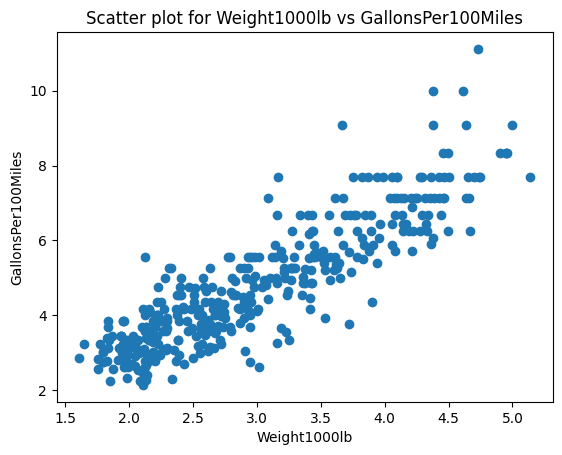

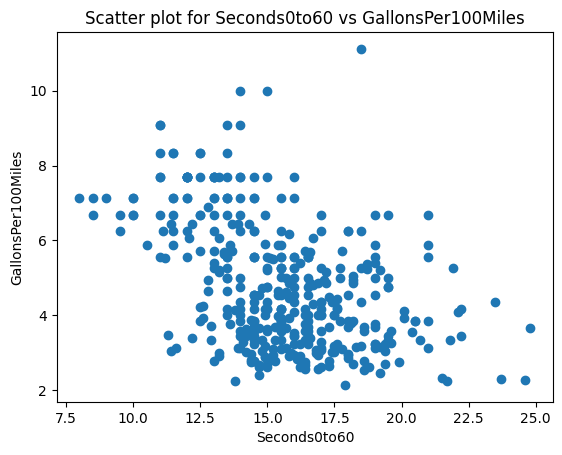

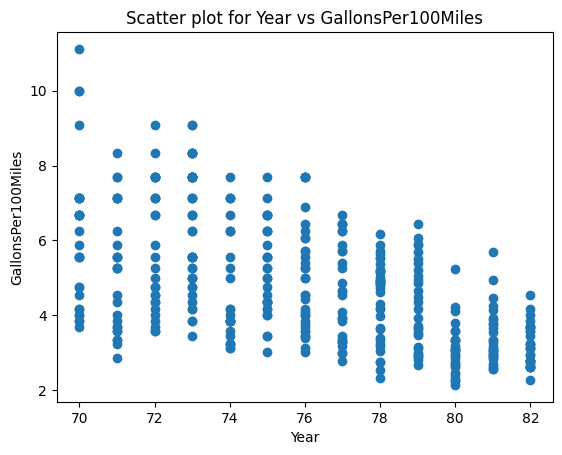

In [162]:
scatter_columns = ['GallonsPer100Miles', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60', 'Year']
for col in scatter_columns:
    plt.scatter(auto_MPG[col], auto_MPG['GallonsPer100Miles'])
    plt.title(f'Scatter plot for {col} vs GallonsPer100Miles')
    plt.xlabel(col)
    plt.ylabel('GallonsPer100Miles')
    plt.show()

In [163]:
correlation_matrix = auto_MPG.iloc[:, :8].corr()
print("\nCorrelation coefficients:")
print(correlation_matrix['GallonsPer100Miles'].sort_values(ascending=False))



Correlation coefficients:
GallonsPer100Miles          1.000000
GallonsPer100MilesTo1981    1.000000
Weight1000lb                0.885056
Displacement100ci           0.866050
Horsepower100               0.854809
Cylinders                   0.839385
Seconds0to60               -0.456338
MPG                        -0.935935
Name: GallonsPer100Miles, dtype: float64


In [164]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)


LinearRegression()

In [165]:
auto_MPG_cleaned = auto_MPG.dropna(subset=['GallonsPer100Miles', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60', 'Year'])

X_cleaned = auto_MPG_cleaned[['GallonsPer100Miles', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60', 'Year']]
y_cleaned = auto_MPG_cleaned['GallonsPer100Miles']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train_cleaned, y_train_cleaned)


LinearRegression()

In [166]:
X_test_imputed = imputer.transform(X_test)  

y_pred = model.predict(X_test_imputed)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)


C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but LinearRegression is expecting 8 features as input.

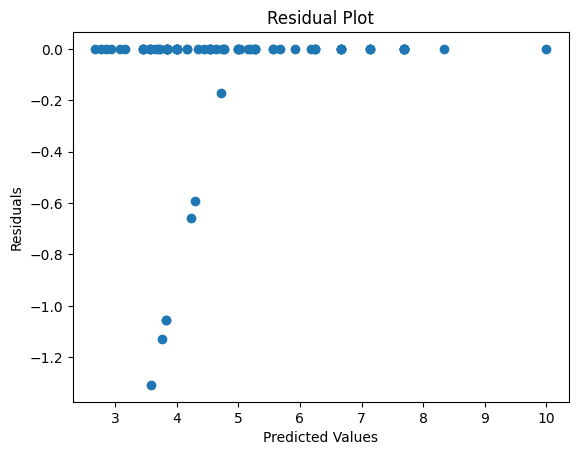

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.07629946641648509
R-squared: 0.9702297446473455


In [167]:
new_values = {
    'GallonsPer100Miles': 0,
    'MPG': 18,
    'Cylinders': 8,
    'Displacement100ci': 3.07,   
    'Horsepower100': 1.3,
    'Weight1000lb': 3.50,
    'Seconds0to60': 12,
    'Year': 70  
}

new_data = pd.DataFrame([new_values])

new_data_imputed = imputer.transform(new_data) 

predicted_gallons_per_100_miles = model.predict(new_data_imputed)

print(f'Predicted GallonsPer100Miles: {predicted_gallons_per_100_miles[0]}')


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- GallonsPer100MilesTo1981
